In [48]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [49]:
file=open("coord.txt","r")
ret=[]
app=[]
for ele in file.read().split("\n"):
    if ele=="":
        ret.append(app)
        app=[]
    else:
        app.append(ele)
ret.append(app)
ret_=[]
app=[]
for i in range(len(ret)):
    ret[i].remove(ret[i][0])
    app=[]
    for j in range(len(ret[i])):
        ret[i][j] = ret[i][j].split(",")
        app.append([500-int(ret[i][j][1])-50,int(ret[i][j][0])])
    ret_.append(app)
    
            
    

In [70]:
corner = np.load("output/train_corner_0.npy")
dic = dict()
dic["test0b"]=ret_[0]
dic["test1b"]=ret_[1]
dic["train1b"]=ret_[2]
dic["train2b"]=ret_[3]
dic["train0b"]=corner.tolist()

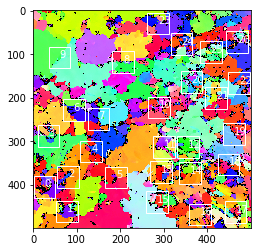

In [64]:
img = cv2.imread("input/test0b.tif")
corner = dic["test0b"]
fig,ax = plt.subplots(1)
ax.imshow(img)        
for i in range(len(corner)):
    sample_y,sample_x = corner[i]
    h,w=50,50
    rect = patches.Rectangle((sample_x,sample_y),50,50,linewidth=1,edgecolor='w',facecolor='none')
    ax.add_patch(rect)
    plt.text(sample_x+25, sample_y+25,str(i),color="w")
# plt.savefig("output/train1b-2.png",dpi=600)
plt.show()

In [71]:
np.save("output/corner.npy",dic)

In [72]:
np.load("output/corner.npy",allow_pickle=1)

array({'test0b': [[380, 1], [437, 53], [357, 55], [263, 10], [299, 108], [359, 166], [204, 68], [224, 125], [93, 182], [83, 35], [198, 264], [289, 275], [289, 330], [346, 269], [349, 336], [416, 259], [444, 358], [439, 440], [329, 424], [259, 436], [140, 339], [176, 395], [142, 448], [5, 262], [52, 316], [70, 383], [47, 443]], 'test1b': [[323, 25], [361, 94], [411, 178], [213, 34], [72, 5], [181, 100], [107, 109], [143, 178], [42, 168], [87, 225], [13, 262], [125, 348], [36, 363], [179, 421], [56, 447], [256, 154], [220, 228], [223, 309], [294, 242], [349, 295], [290, 361], [422, 312], [420, 424], [343, 438]], 'train1b': [[357, 4], [353, 62], [291, 87], [423, 94], [340, 154], [414, 166], [373, 244], [445, 292], [371, 354], [371, 408], [434, 380], [302, 292], [248, 344], [237, 411], [118, 361], [113, 436], [57, 442], [7, 353], [260, 198], [222, 253], [153, 235], [203, 148], [193, 51], [143, 139], [89, 139], [119, 26], [62, 2], [3, 22], [41, 86]], 'train2b': [[431, 22], [375, 9], [302, 1